# Materi Sesi 7

Regression Models

## Linear Regression with Scikit-Learn

In [1]:
# Import Libs

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
# Provide Data

x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

In [3]:
print(x, y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]] [ 5 20 14 32 22 38]


In [4]:
# Create model and fit

model = LinearRegression()

In [5]:
model.fit(x, y)

LinearRegression()

In [6]:
model.score(x, y)

0.7158756137479542

In [7]:
model.intercept_

5.633333333333329

In [8]:
model.coef_

array([0.54])

In [9]:
model.predict([[60]])

array([38.03333333])

In [10]:
y_pred = model.predict(x)

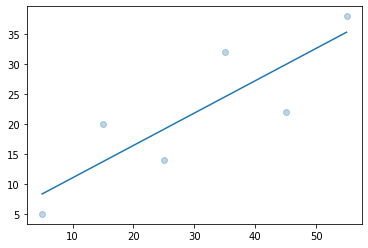

In [12]:
plt.scatter(x, y, alpha=0.3)
plt.plot(x, y_pred)

plt.show()

In [13]:
model.intercept_ + model.coef_ * x

array([[ 8.33333333],
       [13.73333333],
       [19.13333333],
       [24.53333333],
       [29.93333333],
       [35.33333333]])

In [14]:
x_new = np.arange(5).reshape((-1, 1))

model.predict(x_new)

array([5.63333333, 6.17333333, 6.71333333, 7.25333333, 7.79333333])

## Multiple Linear Regression

In [17]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11],
     [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]

x, y = np.array(x), np.array(y)

In [18]:
print(x, y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]] [ 4  5 20 14 32 22 38 43]


In [19]:
model = LinearRegression().fit(x, y)

In [20]:
model.score(x, y)

0.8615939258756775

In [21]:
model.intercept_

5.52257927519819

In [22]:
model.coef_

array([0.44706965, 0.25502548])

In [23]:
model.predict(x)

array([ 5.77760476,  8.012953  , 12.73867497, 17.9744479 , 23.97529728,
       29.4660957 , 38.78227633, 41.27265006])

In [24]:
x_new = np.arange(10).reshape(-1, 2)

model.predict(x_new)

array([ 5.77760476,  7.18179502,  8.58598528,  9.99017554, 11.3943658 ])

## Polynomial Regression

In [25]:
# Import libs

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [26]:
# Provide Data

x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

In [27]:
print(x, y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]] [15 11  2  8 25 32]


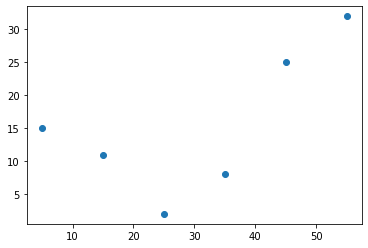

In [28]:
plt.scatter(x, y)

In [29]:
# Transform input data

transformer = PolynomialFeatures(degree=2, include_bias=False)

In [30]:
transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [31]:
x_ = transformer.transform(x)

In [32]:
x_

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

In [33]:
# Create model and fit

model = LinearRegression()

model.fit(x_, y)

LinearRegression()

In [34]:
model.score(x_, y)

0.8908516262498563

In [35]:
# Predict Response

y_pred = model.predict(x_)

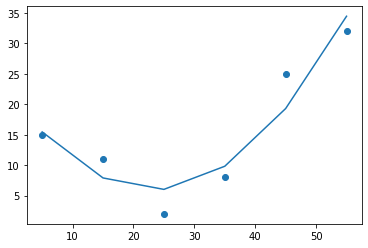

In [36]:
plt.scatter(x, y)
plt.plot(x, y_pred)

## Implementing Linear Regression on Real Dataset

In [37]:
from sklearn import datasets

data = datasets.load_boston()

In [39]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [40]:
import pandas as pd

In [41]:
df = pd.DataFrame(data.data, columns=data.feature_names)

target = pd.DataFrame(data.target, columns=['MEDV'])

In [42]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [43]:
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [44]:
X = df
y = target['MEDV']

In [45]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
model.predict([[]])

In [46]:
model.score(X, y)

0.7406426641094094

## Example 2

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/CarPrice_Assignment.csv',
                usecols= ['horsepower', 'price'])
df.head()

,horsepower,price
0,111,13495.0
1,111,16500.0
2,154,16500.0
3,102,13950.0
4,115,17450.0


In [49]:
x = df['horsepower'].values.reshape(-1, 1)
y = df['price'].values.reshape(-1, 1)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)

In [52]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [53]:
model.score(x_test, y_test)

0.6650311354571994

In [54]:
model.predict([[120]])

array([[15752.59843482]])